In [0]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:

from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
from keras import backend as K
from keras.layers import Conv2D , BatchNormalization
from keras.applications.inception_v3 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau , ModelCheckpoint , LearningRateScheduler

base_model = InceptionV3(weights='imagenet', include_top=False , input_shape=(299, 299, 3))

x = base_model.output
x = Dropout(0.5)(x)
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
predictions = Dense(17, activation='softmax')(x)


model = Model(inputs=base_model.input, outputs=predictions)


lr_reduce = ReduceLROnPlateau(monitor='val_acc', factor=0.1, epsilon=0.0001, patience=1, verbose=1)

filepath="/content/drive/My Drive/A/transferlearning_weights.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')


model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])


data_generator = ImageDataGenerator(preprocessing_function=preprocess_input)


train_generator = data_generator.flow_from_directory(
        '/content/drive/My Drive/A/train',
        target_size=(299, 299),
        batch_size=24,
        class_mode='categorical')

validation_generator = data_generator.flow_from_directory(
        '/content/drive/My Drive/A/val',
        target_size=(299, 299),
        batch_size=16,
        class_mode='categorical')

history1 = model.fit_generator(
           train_generator,
           steps_per_epoch=50,
           validation_data = validation_generator,
           epochs=10,
           validation_steps=50,
           callbacks=[lr_reduce,checkpoint])
 
 

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:1065: UserWarning: `epsilon` argument is deprecated and will be removed, use `min_delta` instead.
  warnings.warn('`epsilon` argument is deprecated and '


Found 656 images belonging to 17 classes.
Found 51 images belonging to 17 classes.
Epoch 1/10
50/50 [==============================] - 113s 2s/step - loss: 0.8861 - acc: 0.7659 - val_loss: 1.5640 - val_acc: 0.5280

Epoch 00001: val_acc improved from -inf to 0.52795, saving model to /content/drive/My Drive/A/transferlearning_weights.hdf5
Epoch 2/10
50/50 [==============================] - 25s 506ms/step - loss: 0.2450 - acc: 0.9417 - val_loss: 0.4422 - val_acc: 0.8257

Epoch 00002: val_acc improved from 0.52795 to 0.82567, saving model to /content/drive/My Drive/A/transferlearning_weights.hdf5
Epoch 3/10
50/50 [==============================] - 26s 526ms/step - loss: 0.2080 - acc: 0.9467 - val_loss: 0.4951 - val_acc: 0.8245

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00003: val_acc did not improve from 0.82567
Epoch 4/10
50/50 [==============================] - 25s 508ms/step - loss: 0.0600 - acc: 0.9892 - val_loss: 0.0388 - val_acc: 1.0000



In [0]:
model.load_weights("/content/drive/My Drive/A/transferlearning_weights.hdf5")

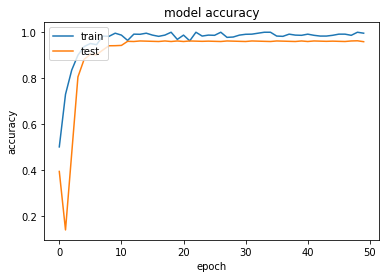

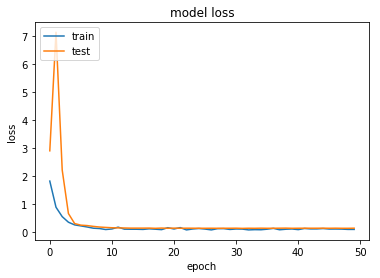

<Figure size 432x288 with 0 Axes>

In [0]:
import matplotlib.pyplot as plt

plt.plot(history1.history['acc'])
plt.plot(history1.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig ( "A.png" )

# summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig ( "L.png" )




In [0]:
!pip install keras 

In [0]:
model.save('/content/drive/My Drive/A/init_weights.h5')

In [0]:
from keras.models import load_model
model = load_model('/content/drive/My Drive/A/init_weights.h5')


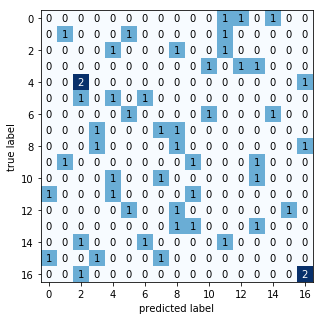

Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.50      0.33      0.40         3
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         3
           7       0.33      0.33      0.33         3
           8       0.20      0.33      0.25         3
           9       0.33      0.33      0.33         3
          10       0.00      0.00      0.00         3
          11       0.00      0.00      0.00         3
          12       0.00      0.00      0.00         3
          13       0.25      0.33      0.29         3
          14       0.00      0.00      0.00         3
          15       0.00      0.00      0.00         3
          16       0.50      0.67      0.57         3

   m

In [0]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

Y_pred = model.predict_generator(validation_generator, np.math.ceil(validation_generator.samples/validation_generator.batch_size) )
y_pred = np.argmax(Y_pred, axis=1)

CM = confusion_matrix(validation_generator.classes, y_pred)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()

print('Classification Report')
print(classification_report(validation_generator.classes, y_pred))


In [0]:
 y_pred 

In [0]:
validation_generator.classes 